In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated('CustomerId').sum()

0

In [6]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [7]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace = True)

C:\Users\jainp\AppData\Local\Temp\ipykernel_12420\1747010795.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace = True)


In [8]:
df['Geography'].value_counts()

Geography
2    5014
1    2509
0    2477
Name: count, dtype: int64

In [9]:
df.loc[(df['Balance']==0),'Exited'].value_counts()

Exited
0    3117
1     500
Name: count, dtype: int64

In [41]:
df.rename(columns={'Exited':'Churn'})

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Zero_Balance
0,1,15634602,Hargrave,619,2,1,42,2,0.00,0,1,1,101348.88,1,0
1,2,15647311,Hill,608,0,1,41,1,83807.86,0,0,1,112542.58,0,1
2,3,15619304,Onio,502,2,1,42,8,159660.80,1,1,0,113931.57,1,1
3,4,15701354,Boni,699,2,1,39,1,0.00,1,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,0,1,43,2,125510.82,0,1,1,79084.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,2,0,39,5,0.00,1,1,0,96270.64,0,0
9996,9997,15569892,Johnstone,516,2,0,35,10,57369.61,0,1,1,101699.77,0,1
9997,9998,15584532,Liu,709,2,1,36,7,0.00,0,0,1,42085.58,1,0
9998,9999,15682355,Sabbatini,772,1,0,42,3,75075.31,1,1,0,92888.52,1,1


In [42]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Zero_Balance'],
      dtype='object')

In [16]:
df.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [19]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace = True)

C:\Users\jainp\AppData\Local\Temp\ipykernel_12420\3376049714.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender':{'Male':0,'Female':1}},inplace = True)


In [20]:
df.Gender.value_counts()

Gender
0    5457
1    4543
Name: count, dtype: int64

In [22]:
df.NumOfProducts.value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [29]:
df.replace({'NumOfProducts':{1:0,2:1,3:1,4:1}},inplace = True)

In [30]:
df.NumOfProducts.value_counts()

NumOfProducts
0    5084
1    4916
Name: count, dtype: int64

In [31]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [33]:
df.HasCrCard.value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [34]:
df.IsActiveMember.value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [37]:
import numpy as np

In [38]:
df['Zero_Balance']= np.where(df['Balance']>0,1,0)

<Axes: >

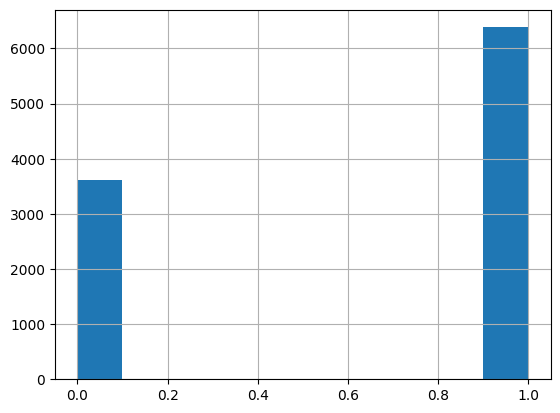

In [39]:
df['Zero_Balance'].hist()

In [40]:
df.columns


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Zero_Balance'],
      dtype='object')

In [43]:
y = df['Exited']

In [44]:
x = df.drop(['RowNumber','CustomerId','Surname','Exited'],axis=1)

In [45]:
x.shape

(10000, 11)

In [46]:
df.shape

(10000, 15)

In [47]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [48]:
import seaborn as sns

<Axes: xlabel='Exited', ylabel='count'>

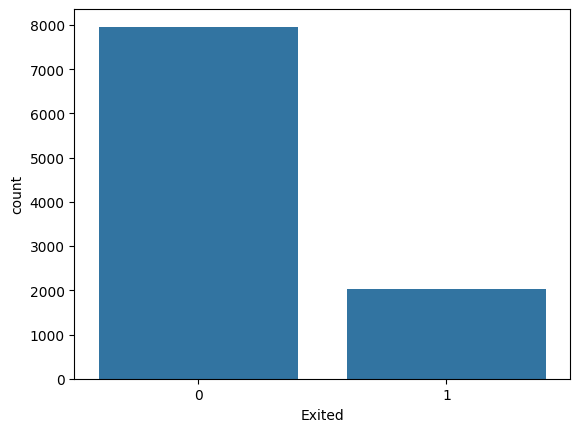

In [54]:
sns.countplot(x='Exited',data=df)

In [57]:
from imblearn.under_sampling import RandomUnderSampler

In [58]:
rs = RandomUnderSampler()

In [59]:
x_rus,y_rus = rs.fit_resample(x,y)

In [60]:
x_rus.shape,y_rus.shape

((4074, 11), (4074,))

In [61]:
x.shape,y.shape

((10000, 11), (10000,))

In [66]:
y_rus.value_counts()

Exited
0    2037
1    2037
Name: count, dtype: int64

In [68]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

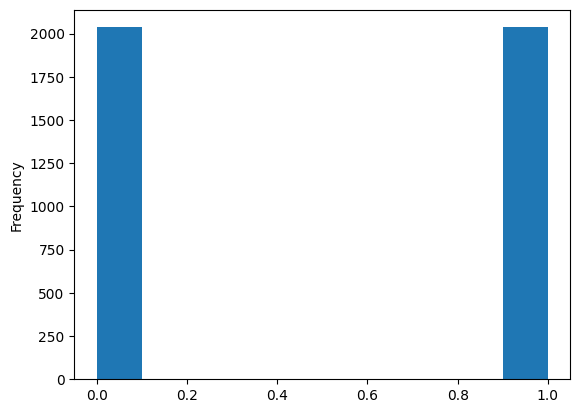

In [70]:
y_rus.plot(ind='hist')

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2520)

In [76]:
x_rus_train,x_rus_test,y_rus_train,y_rus_test = train_test_split(x,y,random_state=2520)

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
sc = StandardScaler()

In [79]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Zero_Balance'],
      dtype='object')

In [83]:
x_train[['CreditScore','Age','Tenure','Balance','EstimatedSalary']]=sc.fit_transform(x_train[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [85]:
x_test[['CreditScore','Age','Tenure','Balance','EstimatedSalary']]=sc.fit_transform(x_test[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [87]:
x_rus_train[['CreditScore','Age','Tenure','Balance','EstimatedSalary']]=sc.fit_transform(x_rus_train[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [88]:
x_rus_test[['CreditScore','Age','Tenure','Balance','EstimatedSalary']]=sc.fit_transform(x_rus_test[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [89]:
from sklearn.svm import SVC

In [90]:
svc = SVC()

In [91]:
svc.fit(x_train,y_train)

SVC()

In [92]:
y_p = svc.predict(x_test)

In [93]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [94]:
confusion_matrix(y_test,y_p)

array([[1951,   40],
       [ 371,  138]], dtype=int64)

In [96]:
print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1991
           1       0.78      0.27      0.40       509

    accuracy                           0.84      2500
   macro avg       0.81      0.63      0.65      2500
weighted avg       0.83      0.84      0.80      2500



In [97]:
svc.fit(x_rus_train,y_rus_train)

SVC()

In [99]:
y_p_rus=svc.predict(x_rus_test)

In [100]:
confusion_matrix(y_rus_test,y_p_rus)

array([[1951,   40],
       [ 371,  138]], dtype=int64)

In [ ]:
print(classification_report(y_test_rus,y_p_))